# **Movie Recommendation System**

**Recommender System** is a system that seeks to predict or fitter preferences according to the user's choices. Recommender systems are utilized in a vanety of areas including movies. music. news. books, research articles. search queries. social tags. and products in general. Recommender systems produce a list Of recommendations in any Of the two ways —

**Collaborative filtering**: Collaborative filtering approaches build a model from the user's past behavior (i e. items purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict Items (or ratings for items) that users may have an interest in.

**Content-based filtering**: Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items With smilar properties. Content-based filtenng methods are totally based on a descnpt•on of the Item and a profile of the user's preferences It recommends items based on the user's past preferences, Let's develop a basic recommendation system using Python and Pandas.

Let's develop a basic recommendation system by suggesting items that are most similar to a particular item. in this case, movies. It just tells what movies/items are most similar to the user's movie choice.

## **Data Source**

https://github.com/YBI-Foundation/Dataset/blob/main/Movies%20Recommendation.csv

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")


## **Import Data**

In [2]:
df = pd.read_csv(r'Movies Recommendation.csv')

## **Describe Data**

In [3]:
df.head()

,Movie_ID,Movie_Title,Movie_Genre,Movie_Language,Movie_Budget,Movie_Popularity,Movie_Release_Date,Movie_Revenue,Movie_Runtime,Movie_Vote,...,Movie_Homepage,Movie_Keywords,Movie_Overview,Movie_Production_House,Movie_Production_Country,Movie_Spoken_Language,Movie_Tagline,Movie_Cast,Movie_Crew,Movie_Director
0,1,Four Rooms,Crime Comedy,en,4000000,22.876230,09-12-1995,4300000,98.0,6.5,...,NaN,hotel new year's eve witch bet hotel room,It's Ted the Bellhop's first night on the job....,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Twelve outrageous guests. Four scandalous requ...,Tim Roth Antonio Banderas Jennifer Beals Madon...,"[{'name': 'Allison Anders', 'gender': 1, 'depa...",Allison Anders
1,2,Star Wars,Adventure Action Science Fiction,en,11000000,126.393695,25-05-1977,775398007,121.0,8.1,...,http://www.starwars.com/films/star-wars-episod...,android galaxy hermit death star lightsaber,Princess Leia is captured and held hostage by ...,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","A long time ago in a galaxy far, far away...",Mark Hamill Harrison Ford Carrie Fisher Peter ...,"[{'name': 'George Lucas', 'gender': 2, 'depart...",George Lucas
2,3,Finding Nemo,Animation Family,en,94000000,85.688789,30-05-2003,940335536,100.0,7.6,...,http://movies.disney.com/finding-nemo,father son relationship harbor underwater fish...,"Nemo, an adventurous young clownfish, is unexp...","[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","There are 3.7 trillion fish in the ocean, they...",Albert Brooks Ellen DeGeneres Alexander Gould ...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton
3,4,Forrest Gump,Comedy Drama Romance,en,55000000,138.133331,06-07-1994,677945399,142.0,8.2,...,NaN,vietnam veteran hippie mentally disabled runni...,A man with a low IQ has accomplished great thi...,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","The world will never be the same, once you've ...",Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"[{'name': 'Alan Silvestri', 'gender': 2, 'depa...",Robert Zemeckis
4,5,American Beauty,Drama,en,15000000,80.878605,15-09-1999,356296601,122.0,7.9,...,http://www.dreamworks.com/ab/,male nudity female nudity adultery midlife cri...,"Lester Burnham, a depressed suburban father in...","[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Look closer.,Kevin Spacey Annette Bening Thora Birch Wes Be...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [5]:
df.shape

(4760, 21)

In [6]:
df.describe()

,Movie_ID,Movie_Budget,Movie_Popularity,Movie_Revenue,Movie_Runtime,Movie_Vote,Movie_Vote_Count
count,4760.000000,4.760000e+03,4760.000000,4.760000e+03,4758.000000,4760.000000,4760.000000
mean,2382.566387,2.920129e+07,21.599510,8.263743e+07,107.184111,6.113866,692.508403
std,1377.270159,4.075620e+07,31.887919,1.630554e+08,21.960332,1.141294,1235.007337
min,1.000000,0.000000e+00,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,1190.750000,9.257500e+05,4.807074,0.000000e+00,94.000000,5.600000,55.000000
50%,2380.500000,1.500000e+07,13.119058,1.944716e+07,104.000000,6.200000,238.000000
75%,3572.250000,4.000000e+07,28.411929,9.341276e+07,118.000000,6.800000,740.250000
max,4788.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [7]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

## **Data Visualization**

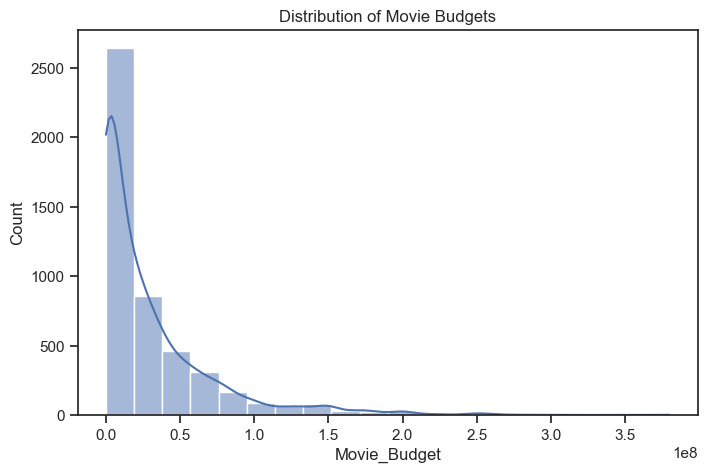

In [8]:
# Visualization 1: Movie Budget (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Movie_Budget', bins=20, kde=True)
plt.title('Distribution of Movie Budgets')
plt.show()

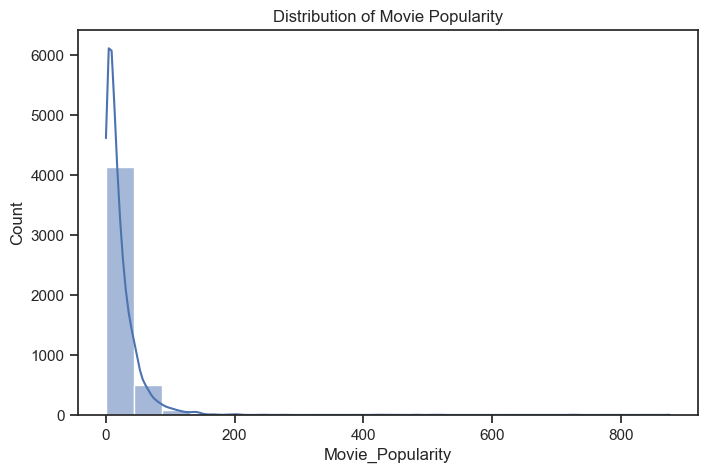

In [9]:
# Visualization 2: Movie Popularity (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Movie_Popularity', bins=20, kde=True)
plt.title('Distribution of Movie Popularity')
plt.show()

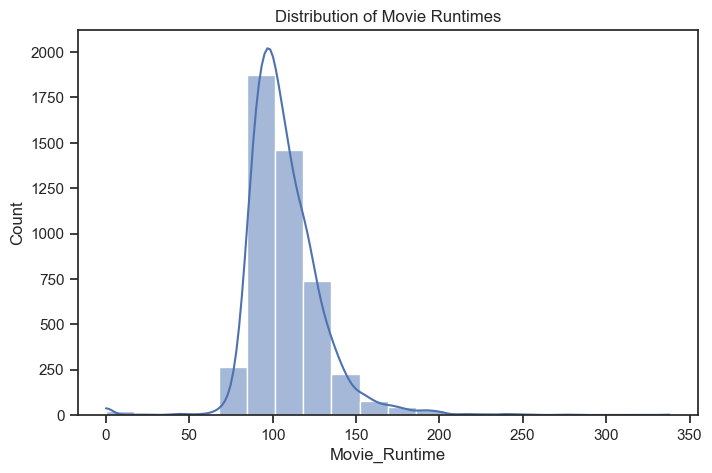

In [10]:
# Visualization 3: Movie Runtime (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Movie_Runtime', bins=20, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.show()

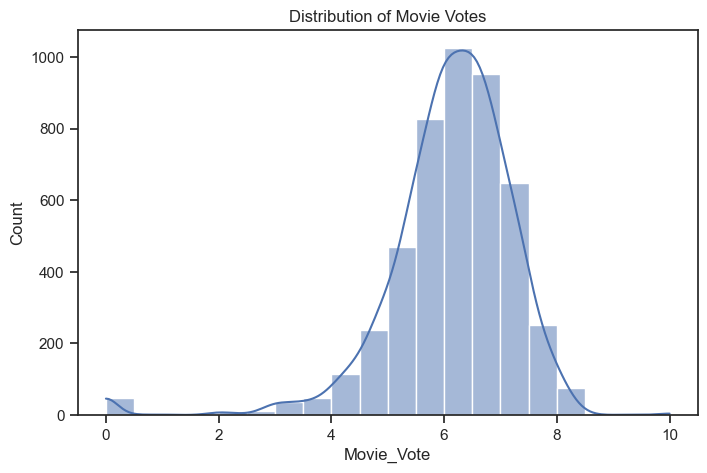

In [11]:
# Visualization 4: Movie Vote (Histogram)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Movie_Vote', bins=20, kde=True)
plt.title('Distribution of Movie Votes')
plt.show()


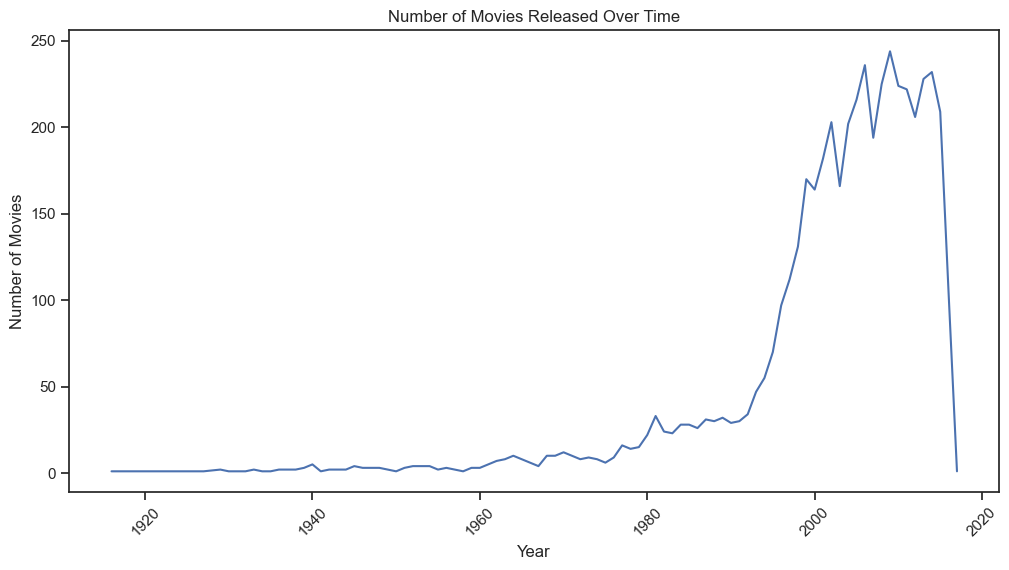

In [12]:
# Visualization 5: Movie Release Date (Time Series Line Plot)
df['Movie_Release_Date'] = pd.to_datetime(df['Movie_Release_Date'], format='%d-%m-%Y')
df['Release_Year'] = df['Movie_Release_Date'].dt.year
release_counts = df['Release_Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_counts.index, y=release_counts.values)
plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

## **Data Preprocessing**

In [13]:
df_features = df[['Movie_Genre', 'Movie_Keywords','Movie_Cast','Movie_Tagline','Movie_Director']].fillna('')

In [14]:
df_features.shape

(4760, 5)

In [15]:
df_features

,Movie_Genre,Movie_Keywords,Movie_Cast,Movie_Tagline,Movie_Director
0,Crime Comedy,hotel new year's eve witch bet hotel room,Tim Roth Antonio Banderas Jennifer Beals Madon...,Twelve outrageous guests. Four scandalous requ...,Allison Anders
1,Adventure Action Science Fiction,android galaxy hermit death star lightsaber,Mark Hamill Harrison Ford Carrie Fisher Peter ...,"A long time ago in a galaxy far, far away...",George Lucas
2,Animation Family,father son relationship harbor underwater fish...,Albert Brooks Ellen DeGeneres Alexander Gould ...,"There are 3.7 trillion fish in the ocean, they...",Andrew Stanton
3,Comedy Drama Romance,vietnam veteran hippie mentally disabled runni...,Tom Hanks Robin Wright Gary Sinise Mykelti Wil...,"The world will never be the same, once you've ...",Robert Zemeckis
4,Drama,male nudity female nudity adultery midlife cri...,Kevin Spacey Annette Bening Thora Birch Wes Be...,Look closer.,Sam Mendes
...,...,...,...,...,...
4755,Horror,,Lisa Hart Carroll Michael Des Barres Paul Drak...,The hot spot where Satan's waitin'.,Pece Dingo
4756,Comedy Family Drama,,Roni Akurati Brighton Sharbino Jason Lee Anjul...,It’s better to stand out than to fit in.,Frank Lotito
4757,Thriller Drama,christian film sex trafficking,Nicole Smolen Kim Baldwin Ariana Stephens Brys...,She never knew it could happen to her...,Jaco Booyens
4758,Family,,,,


In [16]:
X =  df_features['Movie_Genre'] + ' ' +   df_features['Movie_Keywords'] + ' ' +  df_features['Movie_Cast'] + ' ' + df_features['Movie_Tagline'] + ' ' + df_features['Movie_Director']

In [17]:
X

0       Crime Comedy hotel new year's eve witch bet ho...
1       Adventure Action Science Fiction android galax...
2       Animation Family father son relationship harbo...
3       Comedy Drama Romance vietnam veteran hippie me...
4       Drama male nudity female nudity adultery midli...
                              ...                        
4755    Horror  Lisa Hart Carroll Michael Des Barres P...
4756    Comedy Family Drama  Roni Akurati Brighton Sha...
4757    Thriller Drama christian film sex trafficking ...
4758                                           Family    
4759    Documentary music actors legendary perfomer cl...
Length: 4760, dtype: object

In [18]:
X.shape

(4760,)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
tfidf = TfidfVectorizer()

In [21]:
X = tfidf.fit_transform(X)

In [22]:
X.shape

(4760, 17258)

In [23]:
print(X)

  (0, 617)	0.1633382144407513
  (0, 492)	0.1432591540388685
  (0, 9048)	0.0866842116160778
  (0, 11161)	0.06250380151644369
  (0, 16773)	0.17654247479915475
  (0, 5612)	0.08603537588547631
  (0, 16735)	0.10690083751525419
  (0, 7904)	0.13348000542112332
  (0, 15219)	0.09800472886453934
  (0, 11242)	0.07277788238484746
  (0, 3878)	0.11998399582562203
  (0, 5499)	0.11454057510303811
  (0, 7071)	0.19822417598406614
  (0, 7454)	0.14745635785412262
  (0, 1495)	0.19712637387361423
  (0, 9206)	0.15186283580984414
  (0, 11244)	0.08262965296941757
  (0, 614)	0.07642616241686973
  (0, 12731)	0.19712637387361423
  (0, 13467)	0.19712637387361423
  (0, 5662)	0.1465525095337543
  (0, 6463)	0.18801785343006192
  (0, 11362)	0.18801785343006192
  (0, 15708)	0.17654247479915475
  (0, 15413)	0.1465525095337543
  :	:
  (4757, 5455)	0.12491480594769522
  (4757, 2967)	0.16273475835631626
  (4757, 8464)	0.23522565554066333
  (4757, 6938)	0.17088173678136628
  (4757, 8379)	0.17480603856721913
  (4757, 15303)	

## **Modeling**

In [24]:
from sklearn.metrics.pairwise import cosine_similarity
Similarity_Score  = cosine_similarity(X)
Similarity_Score

array([[1.        , 0.01351235, 0.03570468, ..., 0.        , 0.        ,
        0.        ],
       [0.01351235, 1.        , 0.00806674, ..., 0.        , 0.        ,
        0.        ],
       [0.03570468, 0.00806674, 1.        , ..., 0.        , 0.08014876,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.08014876, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [25]:
Similarity_Score.shape

(4760, 4760)

# **Prediction**

## Get Movie Name as Input from User and Validate for Closest Spelling

In [26]:
Favourite_movie_Name =  input('Enter your favourite movie name : ')

Enter your favourite movie name : Flash


In [27]:
all_movies_titles_list = df['Movie_Title'].tolist()

In [28]:
import difflib

In [29]:
Movie_Recommandation = difflib.get_close_matches(Favourite_movie_Name,all_movies_titles_list)

In [30]:
Movie_Recommandation

['Splash', 'Foolish', 'Flashdance']

In [31]:
close_matches = Movie_Recommandation[0]
print(close_matches)

Splash


In [32]:
index_close_match_movie = df[df.Movie_Title == close_matches]['Movie_ID'].values[0]
print(index_close_match_movie)

737


In [33]:
# Get a list of similarity scores for the closest match
Recommandation_Score = list(Similarity_Score[index_close_match_movie])

#getting a list of similar novies
movie_similarity_scores = list(enumerate(Recommandation_Score))
print(movie_similarity_scores)

[(0, 0.04261111002767651), (1, 0.0), (2, 0.01729423495561684), (3, 0.05194586727049377), (4, 0.0034757331955771274), (5, 0.016439578071213448), (6, 0.0), (7, 0.03884855047395343), (8, 0.012090645717408637), (9, 0.012748558762884426), (10, 0.019545350839917316), (11, 0.00884176864160956), (12, 0.024858443021003276), (13, 0.0), (14, 0.02497424359458178), (15, 0.09668912527641522), (16, 0.025545537857272836), (17, 0.0), (18, 0.05221708525500508), (19, 0.011410236710828796), (20, 0.0034455870690931686), (21, 0.0035227383820943432), (22, 0.03199565662797093), (23, 0.041214885860741776), (24, 0.02300871850570744), (25, 0.033860023345201724), (26, 0.0032231722494732887), (27, 0.0), (28, 0.014413234384662842), (29, 0.06101278174546358), (30, 0.0), (31, 0.0030980719335739985), (32, 0.023447122286732264), (33, 0.027650944529255383), (34, 0.003427811283918663), (35, 0.04568450034311358), (36, 0.06431516985900701), (37, 0.01436189701675769), (38, 0.016223202696051906), (39, 0.010531344280578064), 

In [34]:
len(Recommandation_Score)

4760

# Get All Movies Sort Based on Recommendation Score wrt Favourite Movie

In [35]:
#sorting the mvies based on their si•iiarity score

Sorted_Similar_Movies = sorted(movie_similarity_scores, key=lambda x: x[1], reverse=True)
sorted_movie_ids = [movie[0] for movie in Sorted_Similar_Movies]
print(sorted_movie_ids)

[737, 2846, 4381, 2786, 2838, 2553, 537, 768, 3800, 455, 1472, 1302, 3410, 2434, 246, 3234, 1157, 2051, 2320, 2186, 1690, 1329, 4618, 3617, 535, 4425, 538, 206, 2155, 1170, 949, 4521, 1422, 199, 464, 1849, 1544, 4201, 4580, 1389, 1804, 3537, 1910, 1787, 1327, 48, 3918, 15, 4183, 4061, 4073, 3116, 434, 2582, 203, 2873, 1743, 3176, 1593, 1788, 3607, 409, 3265, 2469, 760, 2447, 1935, 2128, 3283, 703, 3111, 269, 4355, 832, 3581, 697, 380, 3335, 1837, 4681, 679, 820, 217, 1565, 1140, 4628, 4459, 1094, 664, 3408, 3068, 582, 3758, 3516, 2050, 3578, 2140, 1107, 1106, 1654, 2908, 1860, 1408, 648, 957, 3831, 3416, 2116, 1871, 817, 907, 2254, 3577, 1655, 3479, 618, 2031, 4068, 706, 3780, 1719, 4025, 3740, 3303, 3237, 3919, 2465, 1597, 4420, 3026, 1038, 1619, 612, 788, 385, 2335, 1087, 3646, 3414, 2562, 838, 1869, 3503, 895, 472, 2576, 1278, 2161, 3013, 4486, 2167, 1330, 2234, 1903, 130, 4452, 3235, 3936, 1889, 1897, 2221, 1090, 4012, 121, 947, 2570, 2460, 2732, 3226, 4371, 193, 1707, 1714, 407, 2

In [36]:
print('print the name  of similar movies based on the index')

print('Top 30 Movies Suggested For You: /n')
i = 1

for movie_id in sorted_movie_ids[:30]:
    # Get the movie title based on the movie ID
    title = df.loc[df['Movie_ID'] == movie_id]['Movie_Title'].values[0]
    print(f'{i}. {title}')
    i += 1

print the name  of similar movies based on the index
Top 30 Movies Suggested For You: /n
1. Splash
2. Masked and Anonymous
3. The Best of Me
4. Saw VI
5. Warlock: The Armageddon
6. The Ballad of Jack and Rose
7. Liar Liar
8. The Apostle
9. Chronicle
10. Because I Said So
11. United 93
12. The Edge
13. Fetching Cody
14. Jonah: A VeggieTales Movie
15. Monsters, Inc.
16. RED
17. Wayne's World
18. Snow Dogs
19. Snow Angels
20. Airborne
21. Next Friday
22. Spy Kids 2: The Island of Lost Dreams
23. Central Intelligence
24. Like Crazy
25. Hitman
26. Barbecue
27. The Island
28. Borat: Cultural Learnings of America for Make Benefit Glorious Nation of Kazakhstan
29. Freeze Frame
30. What Just Happened


# Top 10 Movie Recommendation System

In [37]:
# Get user input for a favorite movie
Favourite_movie_Name = input('Enter your favorite movie name: ')

Enter your favorite movie name: Spider-man


In [38]:
# Get a list of all movie titles
all_movies_titles_list = df['Movie_Title'].tolist()

In [39]:
# Find a close match for the user's input
Movie_Recommendation = difflib.get_close_matches(Favourite_movie_Name, all_movies_titles_list)


In [40]:
# Get the closest match
close_matches = Movie_Recommendation[0]


In [41]:
# Find the index of the closest match in the DataFrame
index_close_match_movie = df[df.Movie_Title == close_matches]['Movie_ID'].values[0]


In [42]:
# Get a list of similarity scores for the closest match
Recommandation_Score = list(Similarity_Score[index_close_match_movie])


In [43]:
# Create a list of tuples where each tuple contains a movie ID and its similarity score
movie_similarity_scores = list(enumerate(Recommandation_Score))


In [44]:
# Sort the list based on the similarity score in descending order
Sorted_Similar_Movies = sorted(movie_similarity_scores, key=lambda x: x[1], reverse=True)


In [45]:
# Extract the sorted movie IDs
sorted_movie_ids = [movie[0] for movie in Sorted_Similar_Movies]


In [46]:
print('Print the names of similar movies based on the index')
print('Top 10 Movies Suggested For You:\n')
i = 1

# Loop through the first 10 movie IDs in the sorted list
for movie_id in sorted_movie_ids[:10]:
    # Get the movie title based on the movie ID
    title = df.loc[df['Movie_ID'] == movie_id]['Movie_Title'].values[0]
    print(f'{i}. {title}')
    i += 1

Print the names of similar movies based on the index
Top 10 Movies Suggested For You:

1. Spider-Man
2. Spider-Man 2
3. Fight Club
4. Mozart's Sister
5. Robin and Marian
6. Katy Perry: Part of Me
7. Elysium
8. Chicken Run
9. Corky Romano
10. Teenage Mutant Ninja Turtles


## **Explaination**

The provided code implements a basic movie recommendation system using content-based filtering. It calculates the similarity between movies based on their features and recommends similar movies to the user's input.

In this system, the user can input their favorite movie, and the system finds the closest matching movie from the dataset. Then, it provides a list of movies that are most similar to the user's choice.

The code includes data visualization, data preprocessing, modeling, and prediction steps, allowing users to explore and receive movie recommendations based on their preferences.